# Week 5 - Data visualisation

Learning objectives: 
- explain what data visualisation is about
- know about different visualisation tools (plotting techniques)
- understand the differences between a figure and axis instance (matploblib)
- do your own visualisations in Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (16,9)
plt.close("all")

## What is data visualisation and why do we need it?

Data visualization is the graphical representation of information and data. Data visualization tools are means to understand trends, outliers, and patterns in data [1].

Categorise data visualisation into:
- exploratory analysis
- communication of results (e.g. of your analysis) 

[1]: https://www.tableau.com/learn/articles/data-visualization#:~:text=Data%20visualization%20is%20the%20graphical,outliers%2C%20and%20patterns%20in%20data.

In [2]:
bikes = pd.read_csv("../data/bikesharing/data.csv")
bikes["timestamp"] = pd.to_datetime(bikes["timestamp"],  format="%Y-%m-%d %H:%M:%S")

print(f"bikes.shape: {bikes.shape}\n")
bikes.head()

bikes.shape: (17414, 10) 



,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [3]:
def plot_timeseries(df, x_col, y_col):
    fig, ax = plt.subplots()
    ax.plot(df[x_col], df[y_col])
    ax.set_title("Time series plot")
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.grid(which="both")
    
    return fig, ax 


def plot_scatter(df, x_col, y_col):
    fig, ax = plt.subplots()
    ax.scatter(df[x_col], df[y_col])
    ax.set_title("Scatter plot")
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.grid(which="both")
    
    return fig, ax


def plot_scatter_with_diagonal(df, x_col, y_col):
    fig, ax = plt.subplots()
    ax.scatter(df[x_col], df[y_col])
    ax.set_title("Scatter plot")
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    _min = min(ax.get_xlim() + ax.get_ylim())
    _max = max(ax.get_xlim() + ax.get_ylim())
    ax.set_xlim([_min, _max])
    ax.set_ylim([_min, _max])
    ax.plot([0, 1], [0, 1], transform=ax.transAxes, c="red")
    ax.grid(which="both")
    
    return fig, ax


def plot_pie(labels, sizes):
    fig, ax = plt.subplots()
    ax.pie(sizes, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax.axis('equal')  
    
    return fig, ax 


def plot_bar(df, label):
    fig, ax = plt.subplots()
    ax.bar(x=np.arange(len(df)), height=df.values)
    ax.set_xticks(np.arange(len(df)))
    ax.set_xticklabels(df.index.tolist())
    ax.set_xlabel(label)
    ax.set_ylabel("counts")
    
    return fig, ax 

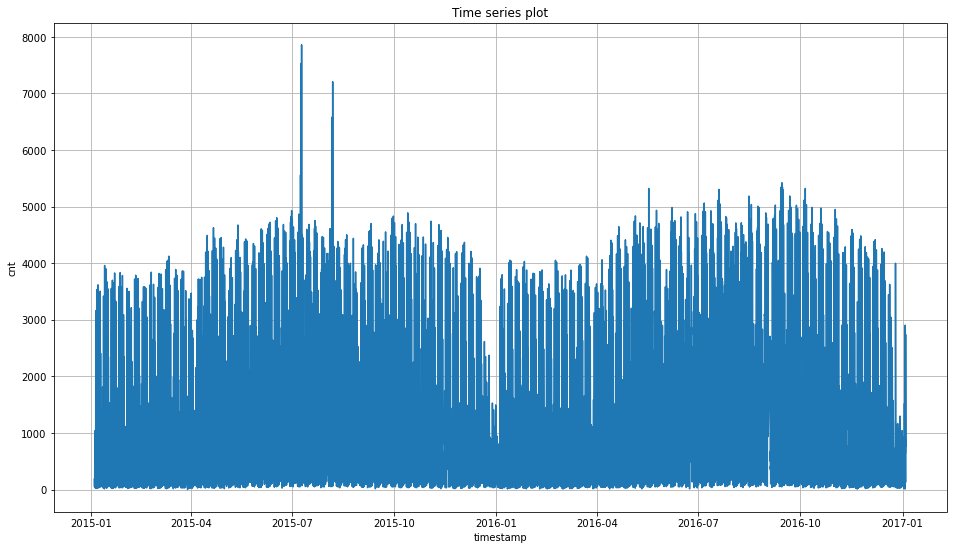

In [4]:
fig, ax = plot_timeseries(df=bikes, x_col="timestamp", y_col="cnt")

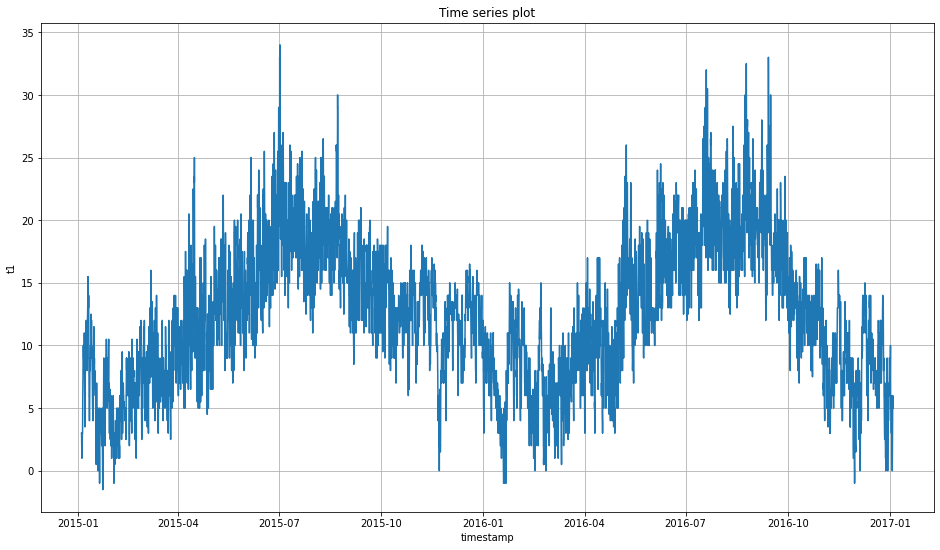

In [5]:
fig, ax = plot_timeseries(df=bikes, x_col="timestamp", y_col="t1")

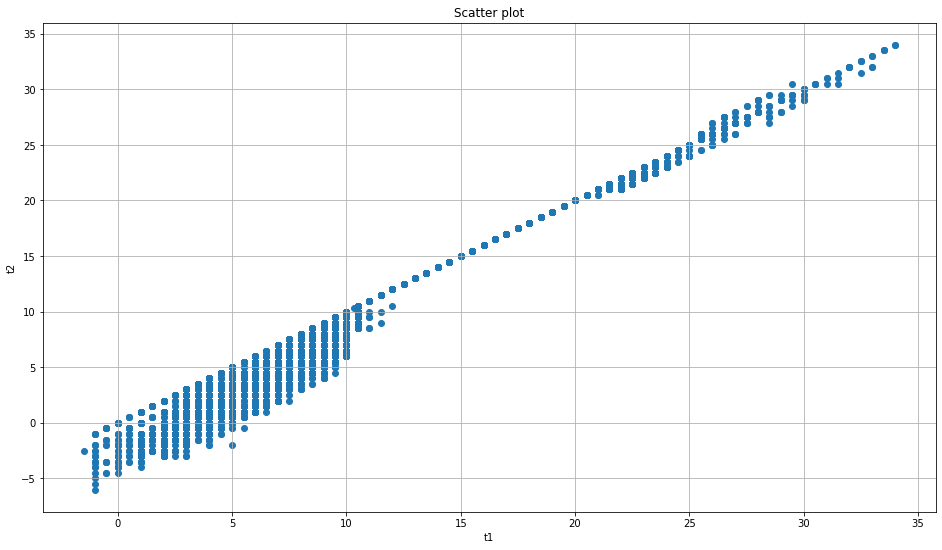

In [6]:
fig, ax = plot_scatter(df=bikes, x_col="t1", y_col="t2")

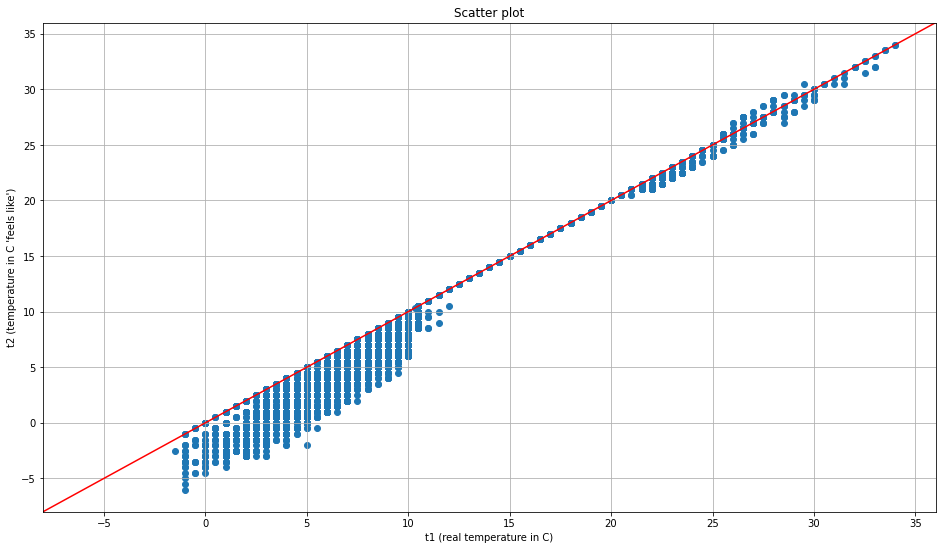

In [7]:
fig, ax = plot_scatter_with_diagonal(df=bikes, x_col="t1", y_col="t2")
ax.set_xlabel("t1 (real temperature in C)")
ax.set_ylabel("t2 (temperature in C 'feels like')")
plt.show()

In [8]:
# col = "weather_code"
# fig, ax = plot_bar(df=bikes[col].value_counts(), label=col)
# ax.set_title(f"Bar plot for {col}")
# plt.show()

In [9]:
# col = "weather_code"
# _val = bikes[col].value_counts()

# fig, ax = plot_pie(labels=_val.index.astype(int).tolist(), 
#                    sizes=_val.values)
# ax.set_title(label=f"Pie chart for {col}", loc="left")
# plt.show()

## How to create your own plots?

## There are a variety of different visualisation libraries available in Python. 

- matplotlib
- seaborn
- ggplot
- bokeh
- pygal
- plotly
- geoplotlib
- gleam
- missingno
- leather

<class 'matplotlib.figure.Figure'> 
 <class 'matplotlib.axes._subplots.AxesSubplot'>


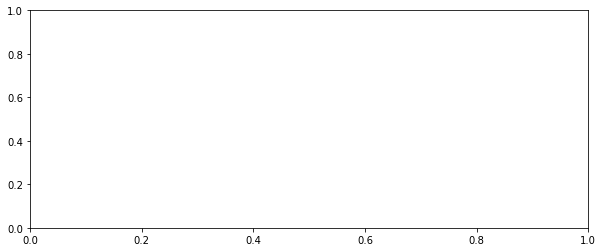

In [24]:
import matplotlib.pyplot as plt

# think of a figure as a piece of paper
fig = plt.figure(figsize=(10, 4))  # create figure instance

# think of an axis instance as a coordinate system that you place on the paper
ax = fig.add_subplot(111)  # create axis instance
print(type(fig), "\n", type(ax))

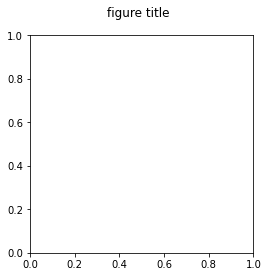

In [11]:
fig.suptitle("figure title")  # add figure title
fig.set_size_inches(4, 4)  # change figure size
fig

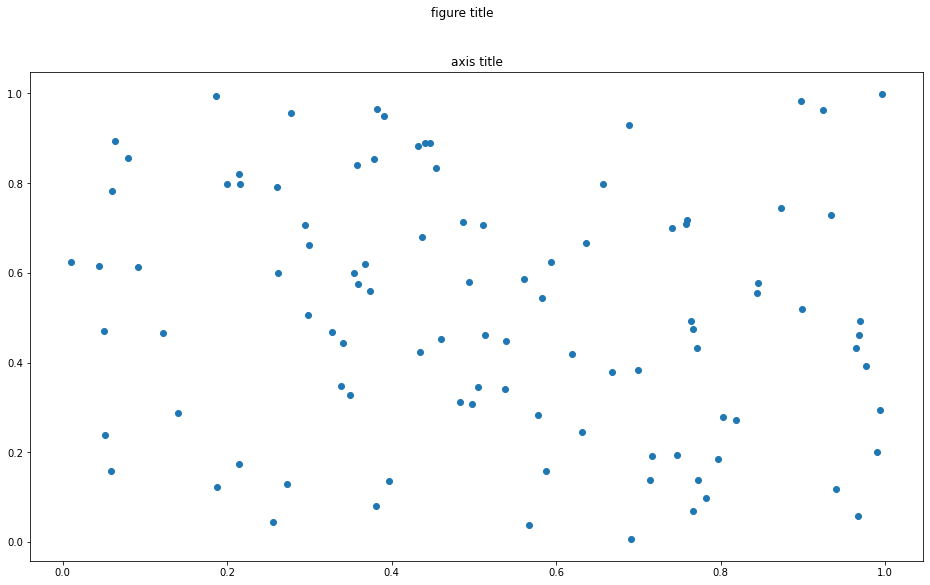

In [12]:
N = 100
ax.scatter(x=np.random.rand(N), y=np.random.rand(N))  # plot random data
ax.set_title("axis title")  
fig.set_size_inches(16, 9)  
fig

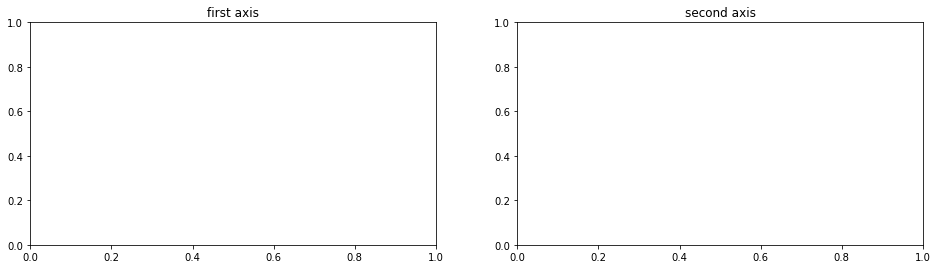

In [13]:
fig = plt.figure()

ax1 = fig.add_subplot(2, 2, 1) 
ax2 = fig.add_subplot(2, 2, 2)
ax1.set_title("first axis")
ax2.set_title("second axis")
plt.show()

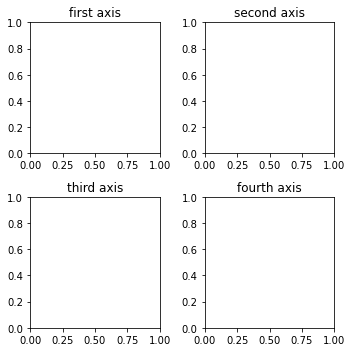

In [14]:
fig = plt.figure(figsize=(5,5))

ax1 = fig.add_subplot(2,2,1) 
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3) 
ax4 = fig.add_subplot(2,2,4)

ax1.set_title("first axis")
ax2.set_title("second axis")
ax3.set_title("third axis")
ax4.set_title("fourth axis")

fig = plt.gcf()
plt.tight_layout()

## But what if I want to create a figure with 3 rows and 5 columns?

axes.shape: (3, 5)


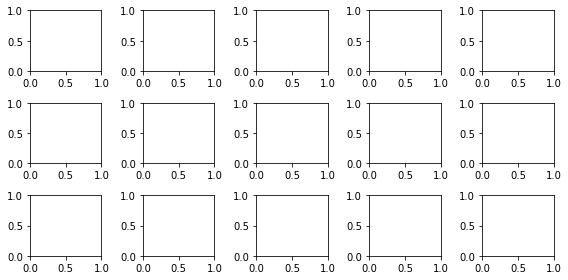

In [15]:
fig = plt.figure(figsize=(8, 4))
axes = []
n_rows, n_cols, count = 3, 5, 1

for row in range(1, n_rows + 1):
    _list = []
    for col in range(1, n_cols + 1):
        _list.append(fig.add_subplot(n_rows, n_cols, count))
        count += 1
    axes.append(np.array(_list).reshape(n_cols, 1))
axes = np.concatenate(axes, axis=1).T
plt.tight_layout()

print(f"axes.shape: {axes.shape}")

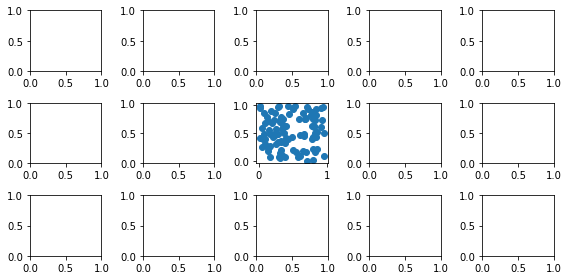

In [16]:
N = 100
axes[1, 2].scatter(np.random.rand(N), np.random.rand(N))
fig

## There is a much easier and smarter way

type(axes): <class 'numpy.ndarray'>, axes.shape: (3, 5)



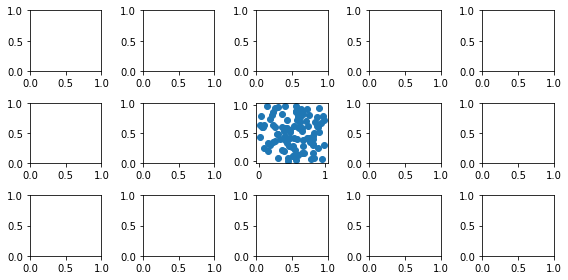

In [17]:
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(8, 4))
print(f"type(axes): {type(axes)}, axes.shape: {axes.shape}\n")
axes[1, 2].scatter(np.random.rand(N), np.random.rand(N))
plt.tight_layout()

## Let's plot some data

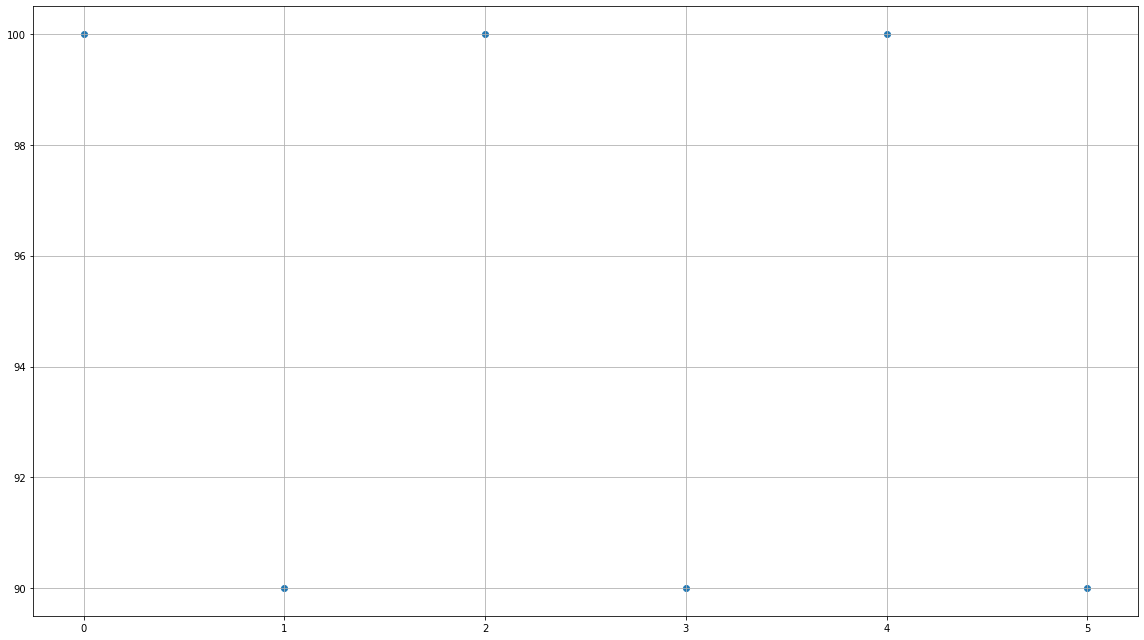

In [18]:
fig, ax = plt.subplots()
x_values = [0, 1, 2, 3, 4, 5]
y_values = [100, 90, 100, 90, 100, 90]
ax.scatter(x_values, y_values)
ax.grid(which="both")
plt.tight_layout()

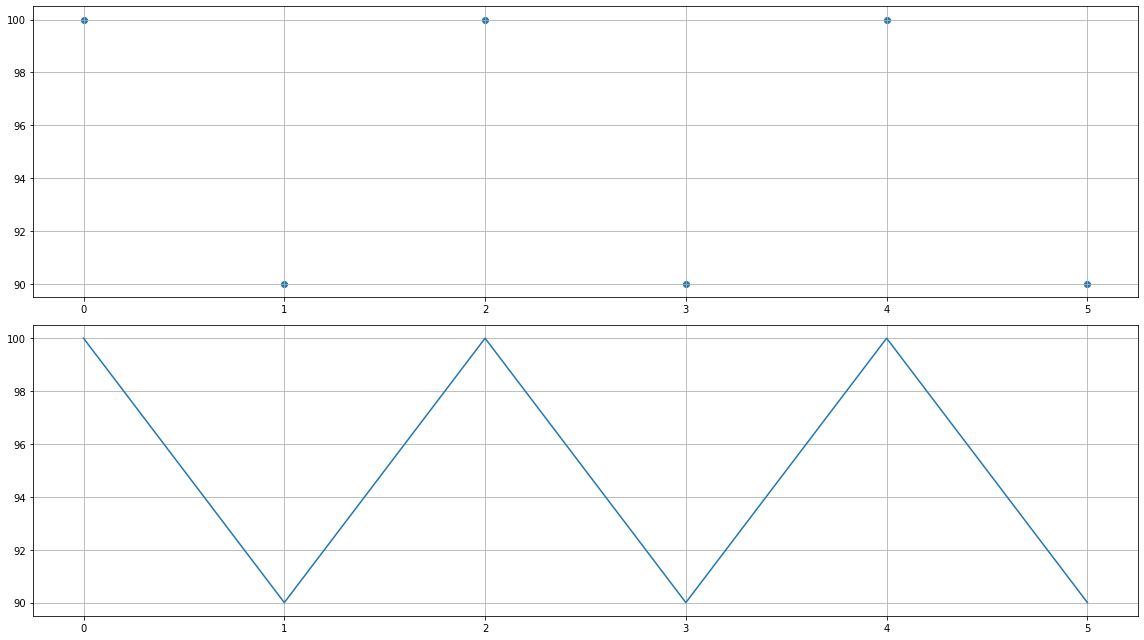

In [19]:
# a lineplot interpolates between each pair of points
fig, axes = plt.subplots(nrows=2)
axes[0].scatter(x_values, y_values)
axes[1].plot(x_values, y_values)
_ = [_ax.grid(which="both") for _ax in axes]
plt.tight_layout()

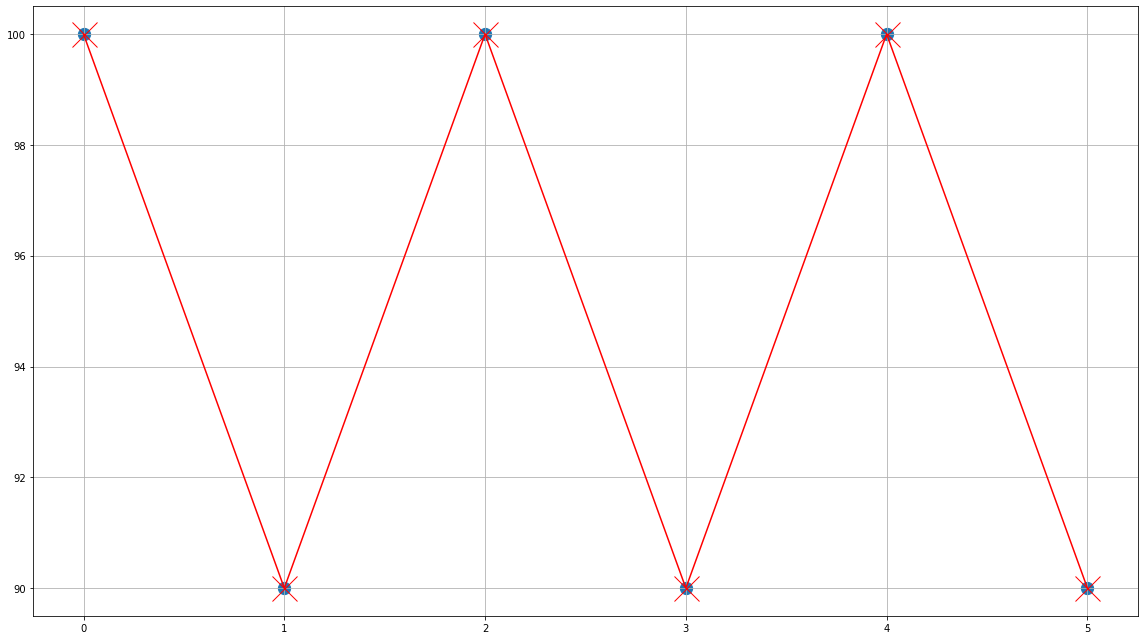

In [20]:
# plot multiple times in the same axis instance 
fig, ax = plt.subplots()
ax.scatter(x_values, y_values, s=150)
ax.plot(x_values, y_values, marker="x", markersize=25, color="red")
ax.grid(which="both")
plt.tight_layout()

### pyplot works with a variety of data types 

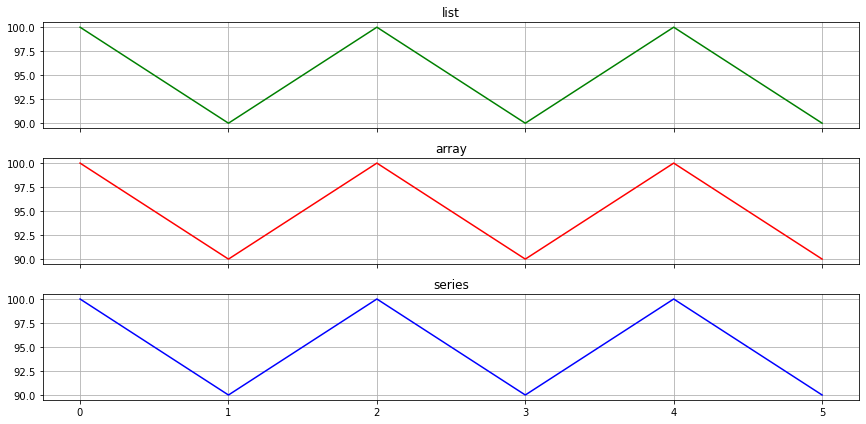

In [21]:
x_arr, y_arr = np.array(x_values), np.array(y_values)
df = pd.DataFrame(data=[x_arr, y_arr], index=["x", "y"]).T

fig, axes = plt.subplots(nrows=3, sharex="all", figsize=(12, 6))
axes[0].plot(x_values, y_values, color="green")
axes[1].plot(x_arr, y_arr, color="red")
axes[2].plot(df["x"], df["y"], color="blue")

_ = [[axes[i].set_title(_title), axes[i].grid(which="both")] for i, _title in enumerate(["list", "array", "series"])]
plt.tight_layout()

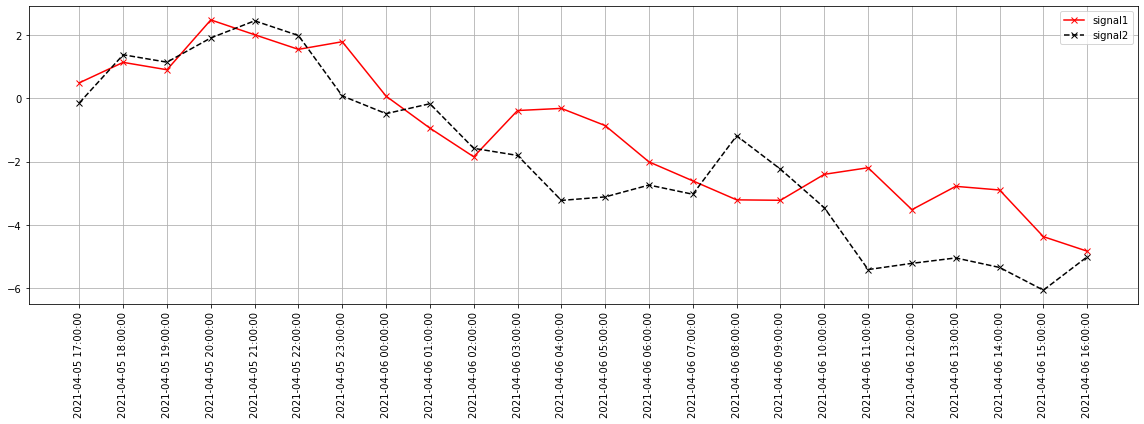

In [22]:
# matplotlib works also nicely with datetime objects
N = 24 
np.random.seed(42)
data = np.random.normal(0, 1, 2 * N).reshape([N,2]).cumsum(axis=0)
df = pd.DataFrame(data=data, 
                  index=pd.date_range(start="04-05-2021 17:00:00", freq="1H", periods=N), 
                  columns=["signal1", "signal2"])

fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(df.index, df["signal1"], marker="x", label="signal1", color="red")
ax.plot(df.index, df["signal2"], marker="x", label="signal2", color="black",linestyle="--")
ax.set_xticks(df.index)
ax.set_xticklabels(df.index, rotation=90)
ax.legend()
ax.grid(which="both")
plt.tight_layout()